In [0]:
# This code is based on an exercise in the Reinforcement Learning textbook by Richard Sutton and Andrew Barto
# Link to the textbook: http://incompleteideas.net/book/RLbook2018.pdf
# The exercise is the car rental exercise found in section 4.4 on page 84
# The dependencies for this code are numpy and python 3.6+

In [0]:
import numpy as np

In [0]:
NUM_STATES = 101 # 0 - 100
V_s = np.zeros(NUM_STATES)
V_s[NUM_STATES - 1] = 1 # Only place where reward is 1

V_index = np.array(range(1, 100))

policy = np.ones(99) # 1 - 99 are not terminal states

def get_actions(s):
  return list(range(1, min(s, 100 - s) + 1))

DELTA_LIM = 0.000001
DISCOUNT = 1

p_h = 0.4

In [4]:
# At most there are 50 actions to take (at state 50, actions: [1,50])

prob_table = []

for s in V_index: # [1, 99]
  heads = []
  tails = []
  for a in get_actions(s): # [1, min(s, 100 - s)]
    heads.append([p_h, 0, s + a])
    tails.append([1 - p_h, 0, s - a])

  for _ in range(50 - len(heads)):
    heads.append([0,0,0])
    tails.append([0,0,0])

  prob_table.append(np.stack([np.array(heads), np.array(tails)], axis = 1))
  
prob_table = np.array(prob_table)
prob_table.shape

(99, 50, 2, 3)

In [0]:
def value_iteration_optimized(V_s):
  delta = DELTA_LIM + 1
  
  new_policy = None
  
  while delta > DELTA_LIM:
    delta = 0
  
    v = V_s.copy()
    
    reward = prob_table[:, :, :, 1] + DISCOUNT * v[prob_table[:, :, :, 2].astype(np.intp)] # (99, 50, 2)
    reward *= prob_table[:, :, :, 0] # (99, 50, 2)
    reward = np.sum(reward, axis=2) # (99, 50)
    
    V_s = np.max(reward, axis = 1) # (99)
    V_s = np.array([0] + V_s.tolist() + [1])
    
    new_policy = np.argmax(reward, axis = 1) + 1
    
    delta = np.amax(np.abs(v - V_s))
    
    print("DELTA", np.round(delta, 6))
    
  return new_policy, V_s



def P(s, a):
  return [[p_h, s + a], [1-p_h, s - a]]

def value_iteration(V_s):
  delta = DELTA_LIM + 1
  
  new_policy = np.ones(99)
  
  while delta > DELTA_LIM:
    delta = 0
    for s in range(1, NUM_STATES - 1):
      v = V_s[s]
      rewards = []
      for a in get_actions(s):
        reward = 0
        for prob, next_state in P(s, a):
          if next_state == 101:
            reward += prob * (1 + DISCOUNT * V_s[next_state])
          else:
            reward += prob * (DISCOUNT * V_s[next_state])
        rewards.append(reward)
      V_s[s] = max(rewards)
      new_policy[s - 1] = np.argmax(rewards) + 1
      delta = max(delta, abs(v - V_s[s]))
    print("DELTA", np.round(delta, 6))
    
  return new_policy, V_s

In [6]:
policy, V_s = value_iteration_optimized(V_s)
print(policy)
print(V_s)

DELTA 0.4
DELTA 0.24
DELTA 0.144
DELTA 0.0864
DELTA 0.05184
DELTA 0.031104
DELTA 0.012442
DELTA 0.007465
DELTA 0.002986
DELTA 0.001792
DELTA 0.001075
DELTA 0.000645
DELTA 0.000258
DELTA 0.000103
DELTA 4.1e-05
DELTA 2.5e-05
DELTA 1e-05
DELTA 6e-06
DELTA 2e-06
DELTA 1e-06
[ 1  2  3  4  5  6  7  8  9 10 11 12 12 11 10  9  8  7 19 20  4  3  2  1
 25  1  2  3  4  5  6  7  8  9 10 11 12 12 11 10  9  8  7  6  5  4  3  2
  1 50  1  2  3  4  5  6  7  8 41 10 39 12 37 11 15 34  8 18  6 30  4  3
  2  1 25  1  2  3  4  5  6  7  8  9 15 11 12 12 11 10  9  8  7  6  5  4
  3  2  1]
[0.         0.00206544 0.00516389 0.0092254  0.01291015 0.01738521
 0.02306349 0.02781403 0.03227537 0.03768487 0.0434633  0.05035437
 0.05765916 0.06523915 0.06953507 0.07443112 0.08068842 0.08661081
 0.09421245 0.10314349 0.10865867 0.11596637 0.12588593 0.13357982
 0.14414789 0.16       0.16309816 0.16774583 0.1738381  0.17936522
 0.18607781 0.19459524 0.20172104 0.20841305 0.2165273  0.22519495
 0.23553156 0.24648874 0

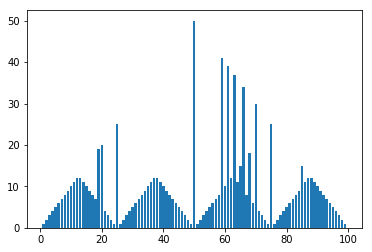

In [7]:
import matplotlib.pyplot as plt
plt.bar(range(1,100), policy)
plt.show()

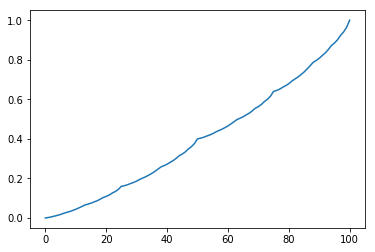

In [8]:
plt.plot(V_s)
plt.show()